In [18]:
from netCDF4 import Dataset, date2num, num2date
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline

In [74]:
lat = -2
lon = -140

LAT = lat
LON = lon

if lat < 0:
    latUnits = 'S'
else:
    latUnits = 'N'

if lon < 0:
    lonUnits = 'W'
else:
    lonUnits = 'E'

lat=abs(lat)
lon=abs(lon)

ds = Dataset(f'../../downloads/Buoy/extractedGZ/WINDS/T_{lat:02d}{latUnits}_{lon:03d}{lonUnits}_COARE3p5_withWave.nc')
#ds = Dataset(f'../../downloads/Buoy/extractedGZ/WINDS/T_{lat:02d}{latUnits}_{lon:03d}{lonUnits}_COARE3p5_2000.nc')

#ds = Dataset('../../downloads/WaveReanalysis/all/T_0N_140W_wave_2000_01_01_T00.00.00_to_2012_12_31_T21.00.00.nc')

In [75]:
ds.variables.keys()

dict_keys(['time', 'U10N', 'U10', 'U10_direction', 'U10N2', 'U102', 'U10_direction2', 'U10N2_x', 'U10N2_y', 'SST', 'VHM0', 'VTPK', 'VPED', 'RH', 'AIRT'])

In [76]:
dateInNumArr = np.array(ds.variables['time'])
dateUnits = ds.variables['time'].units
cftimes = num2date(dateInNumArr, dateUnits)
dates = np.array([datetime(dtm.year, dtm.month, dtm.day, dtm.hour, dtm.minute) for dtm in cftimes])
U10N = np.array(ds.variables['U10N'])#[0:100])
U10N2 = np.array(ds.variables['U10N2'])#[0:100])

U10_dir = np.array(ds.variables['U10_direction'])#[0:100])

U10_dir = (450-U10_dir)%360

U10_dir2 = np.array(ds.variables['U10_direction2'])#[0:100])

ds.close()

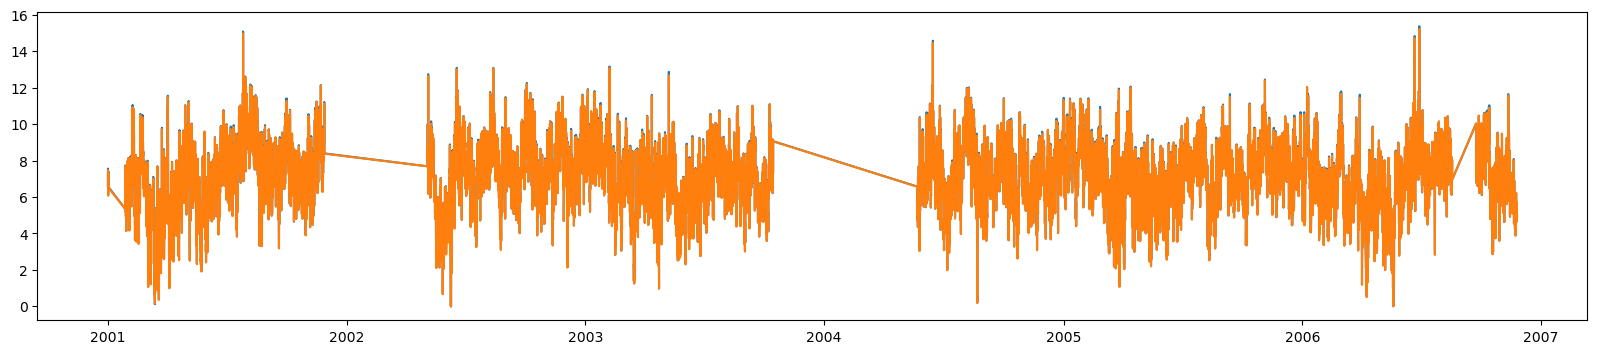

In [77]:
plt.figure(figsize=(20,4))
plt.plot(dates, U10N)
plt.plot(dates, U10N2)

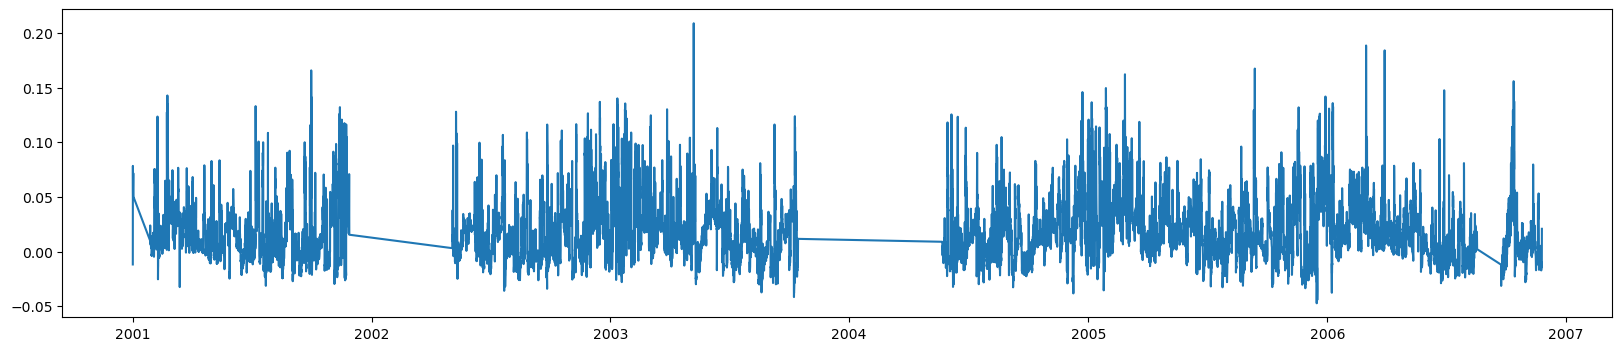

In [78]:
plt.figure(figsize=(20,4))
plt.plot(dates, U10N-U10N2)

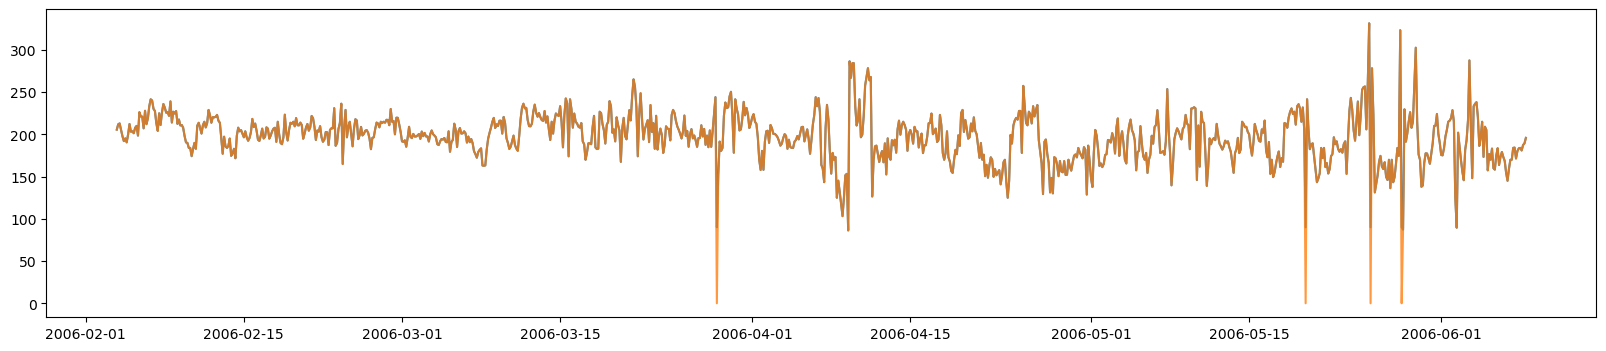

In [73]:
s= -1000#1500 
e =-1
plt.figure(figsize=(20,4))
plt.plot(dates[s:e], U10_dir[s:e])
plt.plot(dates[s:e], U10_dir2[s:e], alpha=0.8)

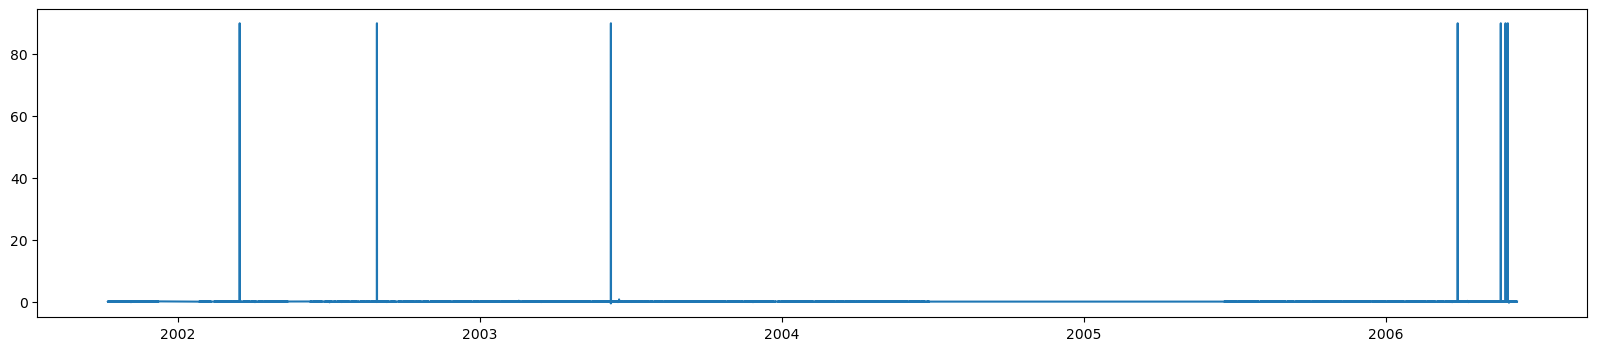

In [69]:
plt.figure(figsize=(20,4))
plt.plot(dates, U10_dir-U10_dir2)
